In [5]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from utils import extract_dates

In [2]:
df = pd.read_csv('../data/ks2.csv', parse_dates=['deadline', 'launched'])

In [6]:
??extract_dates

In [7]:
df = extract_dates(df, date_parts=['year', 'quarter', 'month', 'day'], drop_cols=True)

In [8]:
X = df.drop('state', axis=1)
y = df['state']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True)

In [11]:
y_train.mean()

0.3616004696942601

In [12]:
y_test.mean()

0.3615958753424842

In [19]:
cat_avgs = X_train.groupby('category')['goal'].mean().reset_index().rename({'goal': 'cat_avg'}, axis=1)

In [20]:
cat_avgs

,category,cat_avg
0,3D Printing,42595.774563
1,Academic,65924.926949
2,Accessories,15006.019591
3,Action,338387.860745
4,Animals,10011.428211
...,...,...
154,Woodworking,10648.746537
155,Workshops,9905.306116
156,World Music,31194.772944
157,Young Adult,48275.984329


In [39]:
pipe = make_pipeline(OrdinalEncoder(), xgb.XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.1))

In [21]:
X_train = X_train.merge(cat_avgs, on='category', how='left')
X_test  = X_test.merge(cat_avgs, on='category', how='left')

,ID,name,category,main_category,currency,country,goal,deadline_year,deadline_quarter,deadline_month,deadline_day,launched_year,launched_quarter,launched_month,launched_day,deadline_history_days,launched_history_days,cat_avg
0,609755317,The Plastic Bathtub Soapdish,Fiction,Publishing,USD,US,5000.00,2013,1,1,1,2012,4,12,3,1339,15677,35559.960015
1,479411835,"EMPATHY Shoes; comfy sneaks, personalised x LA...",Footwear,Fashion,EUR,DE,6161.08,2015,2,6,21,2015,2,5,12,2240,16567,24493.356215
2,153920646,Help SilverbySkyline fund their debut Album!,Rock,Music,GBP,GB,770.68,2015,2,5,5,2015,2,4,5,2193,16530,8571.816216
3,1257171028,Relaunch of the Brite Neon Deck,Tabletop Games,Games,USD,US,100.00,2013,2,6,23,2013,2,6,19,1512,15875,14687.530997
4,114885830,"It's not VPN, it's AlwaysHome! Take your conte...",Gadgets,Technology,USD,US,40000.00,2015,4,10,26,2015,4,10,6,2367,16714,50424.993622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296358,668658160,THE PEA SHOOTER - feature film,Narrative Film,Film & Video,USD,US,10000.00,2016,1,2,12,2016,1,1,13,2476,16813,62931.821895
296359,29249610,Steel Aggressor 3rd Album!!!,Metal,Music,USD,US,250.00,2016,1,2,14,2016,1,2,5,2478,16836,7168.720055
296360,119568076,Restore our Vintage USA Made Drums,Music,Music,USD,US,65000.00,2015,3,7,12,2015,2,6,5,2261,16591,22096.289403
296361,405028326,#Opportunityknocks,Music,Music,USD,US,20000.00,2014,3,8,20,2014,3,7,21,1935,16272,22096.289403


In [40]:
pipe.fit(X_train, y_train)

C:\Users\Jonat\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:05:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['name', 'category', 'main_category',
                                      'currency', 'country'],
                                mapping=[{'col': 'name',
                                          'data_type': dtype('O'),
                                          'mapping': The Plastic Bathtub Soapdish                                         1
EMPATHY Shoes; comfy sneaks, personalised x LASERS & TATTOOS         2
Help SilverbySkyline fund their debut Album!                         3
Relaunch of the Brite Neon Deck                                      4
It's not VPN, it's AlwaysHome! Take your con...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=4,
                               min_child_weight=1, mi

In [41]:
pipe.score(X_test, y_test)

0.5961047900554723

In [30]:
from sklearn.metrics import classification_report, plot_confusion_matrix

C:\Users\Jonat\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


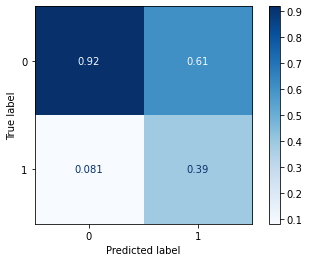

In [31]:
import matplotlib.pyplot as plt
plot_confusion_matrix(pipe, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='pred');

In [32]:
y_test.mean()

0.3615958753424842

In [35]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.14      0.24     47300
           1       0.39      0.98      0.56     26791

    accuracy                           0.44     74091
   macro avg       0.66      0.56      0.40     74091
weighted avg       0.73      0.44      0.36     74091



In [36]:
pipe[-1].get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 200,
 'n_jobs': 12,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [38]:
1 - pipe.predict_proba(X_test)[:, 1]

array([0.07239002, 0.07622647, 0.06953019, ..., 0.1959163 , 0.5507721 ,
       0.2897668 ], dtype=float32)

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.25, random_state=1985)

In [43]:
from sklearn.metrics import f1_score

In [46]:
f1_score(y_test, pipe.predict(X_test))

C:\Users\Jonat\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.5992742075873428

In [45]:
f1_score(y_test, pipe.predict(X_test), labels=['failed', 'successful'], pos_label='successful')

124922    0
151788    0
18028     1
85582     0
26885     1
         ..
56489     1
164673    0
347168    0
282808    0
353005    0
Name: state, Length: 74091, dtype: int64

In [47]:
pos_weights = [1, 2, 3]
cv_scores = []

for weight in pos_weights:
    pipe[-1].set_params(scale_pos_weight=weight)
    pipe.fit(X_train, y_train)
    val_score = f1_score(y_val, pipe.predict(X_val))
    print(f"Validation score with weight of {weight}: {val_score}")
    cv_scores.append((val_score, weight))

C:\Users\Jonat\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\Jonat\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Validation score with weight of 1: 0.4834983498349835
[21:19:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Validation score with weight of 2: 0.6048111016016627
[21:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if yo